In [1156]:
import pandas as pd
import ast, json
import csv
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
conn = sqlite3.connect('im.db.zip')
sns.set_context("poster")
sns.set_style("darkgrid")

In [1157]:
bom_gross_df = pd.read_csv('data/bom.movie_gross.csv.gz')
movies = pd.read_csv('data/tmdb.movies.csv.gz')
budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')
info = pd.read_csv('data/rt.movie_info.tsv', sep='\t')
reviews = pd.read_csv('data/rt.reviews.tsv',sep='\t',encoding='latin1')


In [1092]:
bom_movies['genre_ids'].replace('28','Action')

0               [16, 10751, 35]
3                 [28, 878, 12]
4       [35, 12, 14, 16, 10751]
5           [12, 14, 18, 10749]
6                 [12, 28, 878]
                 ...           
3598               [28, 12, 16]
3602                   [53, 14]
3616            [18, 10752, 53]
3639                  [35, 878]
3640           [878, 35, 10749]
Name: genre_ids, Length: 1404, dtype: object

In [920]:

def parse_col_json(column, key):
    for index,i in zip(bom_movies.index,bom_movies[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))
        bom_movies.loc[index,column]=str(list1)
    
    parse_col_json('genre_ids', 'name')
bom_movies.head()

,title,domestic_gross,foreign_gross,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,release_year
0,Toy Story 3,415000000.0,652000000,"[16, 10751, 35]",en,Toy Story 3,24.445,2010-06-17,7.7,8340.0,2010
3,Inception,292600000.0,535700000,"[28, 878, 12]",en,Inception,27.920,2010-07-16,8.3,22186.0,2010
4,Shrek Forever After,238700000.0,513900000,"[35, 12, 14, 16, 10751]",en,Shrek Forever After,15.041,2010-05-16,6.1,3843.0,2010
5,The Twilight Saga: Eclipse,300500000.0,398000000,"[12, 14, 18, 10749]",en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909.0,2010
6,Iron Man 2,312400000.0,311500000,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,6.8,12368.0,2010


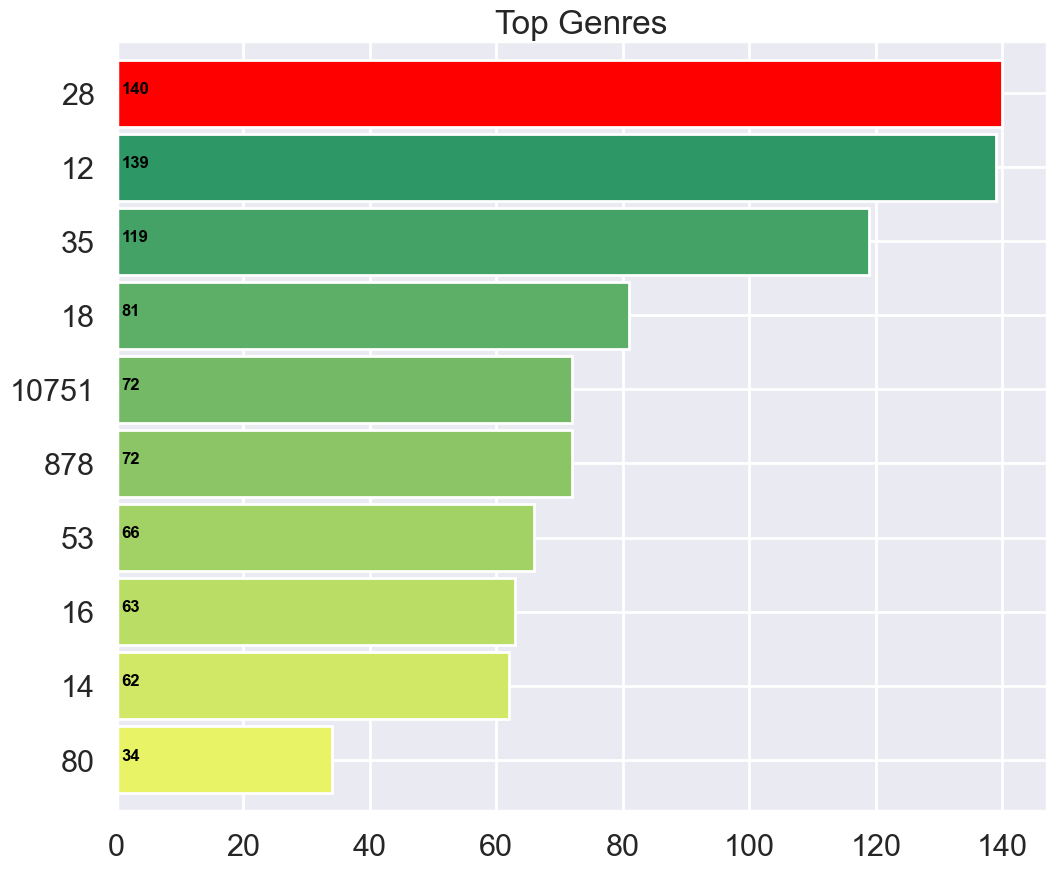

<Figure size 640x480 with 0 Axes>

In [1173]:
plt.subplots(figsize=(12,10))
list1=[]

# extending the list to 
for i in profit['genre_ids']:
    list1.extend(i)
    
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(
    width=0.9,
    color=sns.color_palette('summer_r',10))

for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='black',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top Genres')
plt.show()
plt.savefig('images/gross_hist.jpg')